In [12]:
import os
import numpy as np
from astropy import units as u
from astropy import constants as c
from disk_model import disk_model
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.special import erf, erfc
import diagnostics

from astropy.table import Table, Column

plt.rcParams['font.size'] = 16

from pylab import *
colormap='viridis'

cmap = cm.get_cmap(colormap, 125)
colors = []
for i in range(cmap.N):
    rgb = cmap(i)[:3]
    colors.append(matplotlib.colors.rgb2hex(rgb))
colors = np.array(colors)

In [25]:
date = '07112019'
ya_fmt = "./{0}/{0}_Mstar0.4_r{1}_z{2}_flare.track"
no_fmt = "./{0}/{0}_Mstar0.4_r{1}_z{2}_noflare.track"
pa_fmt = "./{0}/{0}_Mstar0.4_r{1}_z{2}_flare.out"

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in subtract


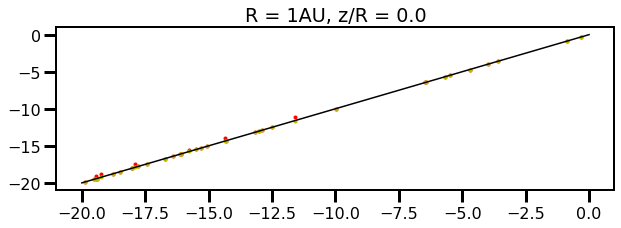

['NH' 'C4H' 'C4N' 'C4H(-)' 'NH2' 'NH3' 'H2CCC' 'C5N(-)' 'HC5N' 'C5N' 'NO'
 'C6H6' 'CH2CCH2' 'C3H4(+)' 'CH2CCH' 'CH3CCH' 'C3H6(+)' 'NH3(+)' 'NO(+)'
 'CH3CH3' 'CH3C4H' 'N2O' 'HCNO' 'HNCO' 'HNO' 'CH2CHCCH' 'CH2CHCHCH2'
 'CH3C3N' 'CH3C5N' 'HNC3' 'NH2CN' 'C3H7(+)' 'C4H7(+)' 'C5H5(+)' 'C6H7(+)'
 'CH3CHOH(+)' 'CH4N(+)' 'H2NC(+)' 'HC3NH(+)' 'HN2O(+)' 'NCCNCH3(+)'
 'NH4(+)' 'grainNH3' 'grainHC5N']


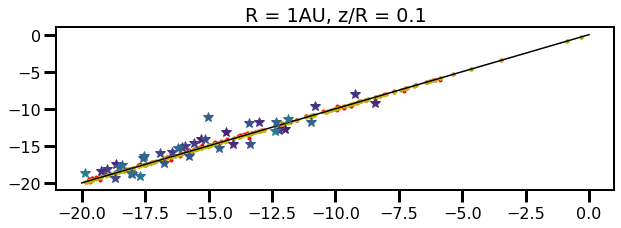

['N' 'C2(-)' 'C4' 'C7' 'C3(-)' 'C4(-)' 'C7(-)' 'C3H(-)' 'C4H' 'C4N'
 'C4H(-)' 'C7H' 'C7H(-)' 'CN(-)' 'HC4H' 'C5H2' 'C5N(-)' 'HC5N' 'C7H2'
 'C2N' 'C5N' 'NO' 'C6H6' 'CH2CN' 'C4H2(+)' 'C2N(+)' 'NO(+)' 'N2' 'C5H2(+)'
 'C7H2(+)' 'C4H(+)' 'C5H(+)' 'C7(+)' 'C7H(+)' 'C7H4(+)' 'N2O' 'N2O(+)'
 'HCNO' 'HNCO' 'HNO(+)' 'CH2CHCCH' 'CH3C3N' 'CH3C5N' 'H2CN' 'C2NH(+)'
 'C5H3(+)' 'C6H3(+)' 'C6H4(+)' 'C7H3(+)' 'C8H3(+)' 'C8H4(+)' 'C8H5(+)'
 'C9H3(+)' 'C9H4(+)' 'CH3C3NH(+)' 'CH3C5NH(+)' 'H2NC(+)' 'H3C7N(+)'
 'H3C9N(+)' 'HC5NH(+)' 'HN2O(+)']


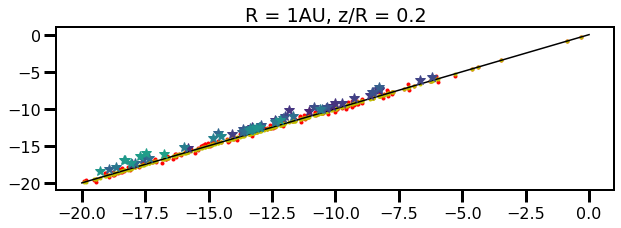

['C3N' 'C4H2(+)' 'C4(+)' 'C4H(+)' 'C3N(+)' 'CH3CNH(+)']


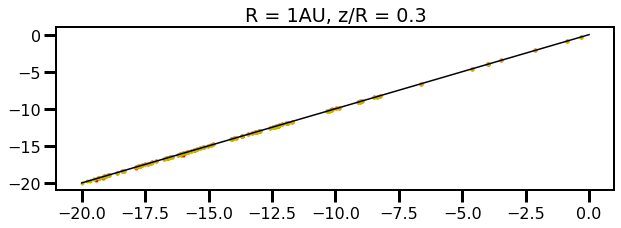

['CH2(+)']


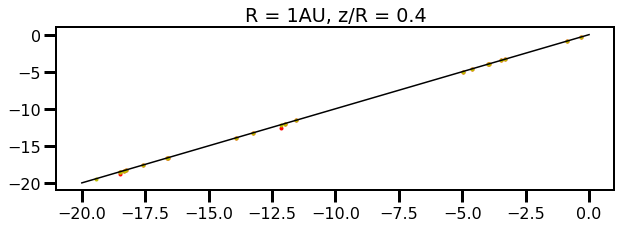

In [26]:
for zr in [0.0, 0.1, 0.2, 0.3, 0.4]:
    tya = Table.read(ya_fmt.format(date, 1.0, zr), format='ascii')
    tno = Table.read(no_fmt.format(date, 1.0, zr), format='ascii')
    param = Table.read(pa_fmt.format(date, 1.0, zr), format='ascii')

    beg_no, end_no = [], []
    beg_ya, end_ya = [], []

    for colname in tno.colnames:
        beg_no.append(tno[colname].data[0])
        beg_ya.append(tya[colname].data[0])

        end_no.append(tno[colname].data[-1])
        end_ya.append(tya[colname].data[-1])

    beg_no, beg_ya = np.log10(beg_no), np.log10(beg_ya)
    end_no, end_ya = np.log10(end_no), np.log10(end_ya)

    fig, ax = plt.subplots(figsize=(10,3))
    plt.plot(end_no, end_ya, 'r.')
    plt.plot(beg_no, beg_ya, 'y.')
    plt.plot(np.arange(-20,1,1), np.arange(-20,1,1), 'k')

    diff = np.abs(end_ya - end_no)
    inds = []
    c = 10

    for j, d in enumerate(diff):
        if d > 0.5:
            inds.append(j)
            plt.plot(end_no[j], end_ya[j], '*', ms=10, c=colors[c])
            c += 1
    if len(inds) > 0:
        print(np.array(tya.colnames)[np.array(inds)])

    ax.set_facecolor("white")

    plt.title('R = 1AU, z/R = {}'.format(zr))
    plt.show()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in subtract


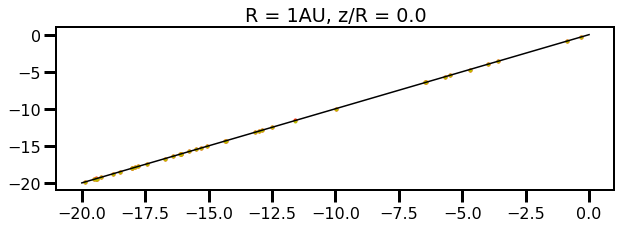

['NH' 'NH2' 'NH3' 'CH2CCH2' 'C3H4(+)' 'C3H6(+)' 'NH3(+)' 'CH3CH3' 'C3H2'
 'CH3C4H' 'N2O' 'HNO' 'CH2CHCCH' 'CH2CHCN' 'CH3C3N' 'CH3C5N' 'NH2CN'
 'C3H7(+)' 'C4H7(+)' 'C5H5(+)' 'CH4N(+)' 'HN2O(+)' 'grainNH3']


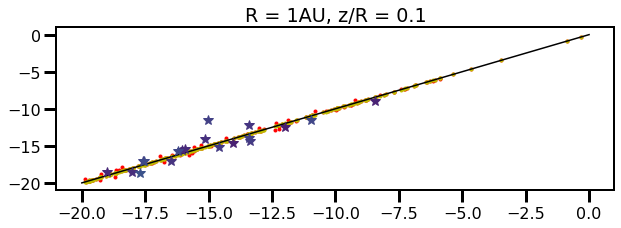

['N' 'C2(-)' 'C4' 'C3(-)' 'C4(-)' 'C3H(-)' 'C4H' 'C4N' 'C4H(-)' 'CN(-)'
 'HC4H' 'C5H2' 'C5N(-)' 'HC5N' 'C2N' 'C5N' 'NO' 'CH2CN' 'C4H2(+)' 'C2N(+)'
 'NO(+)' 'N2' 'C5H2(+)' 'C4H(+)' 'C5H(+)' 'C7H4(+)' 'N2O' 'N2O(+)' 'HCNO'
 'HNCO' 'HNO(+)' 'CH3C5N' 'H2CN' 'C2NH(+)' 'C5H3(+)' 'C6H4(+)' 'C7H3(+)'
 'C8H5(+)' 'C9H3(+)' 'C9H4(+)' 'CH3C3NH(+)' 'CH3C5NH(+)' 'H2NC(+)'
 'H3C7N(+)' 'H3C9N(+)' 'HC5NH(+)' 'HN2O(+)']


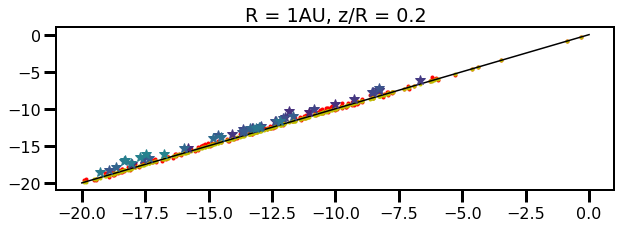

['C3N' 'C4H2(+)' 'C4(+)' 'C4H(+)' 'C3N(+)' 'CH3CNH(+)']


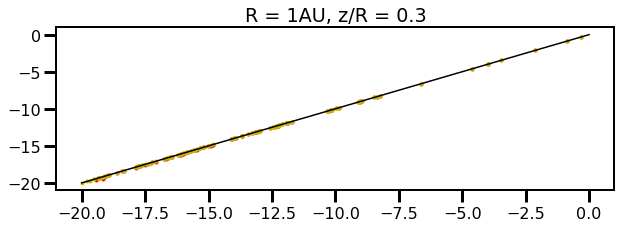

['CH2(+)']


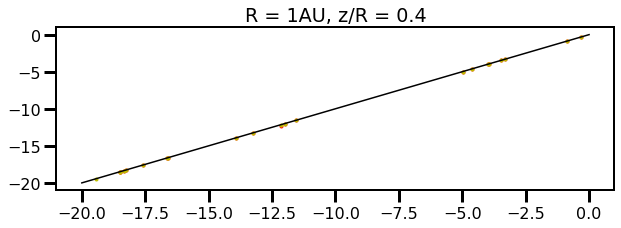

In [27]:
date = '31102019'

for zr in [0.0, 0.1, 0.2, 0.3, 0.4]:
    tya = Table.read(ya_fmt.format(date, 1.0, zr), format='ascii')
    tno = Table.read(no_fmt.format(date, 1.0, zr), format='ascii')
    param = Table.read(pa_fmt.format(date, 1.0, zr), format='ascii')

    beg_no, end_no = [], []
    beg_ya, end_ya = [], []

    for colname in tno.colnames:
        beg_no.append(tno[colname].data[0])
        beg_ya.append(tya[colname].data[0])

        end_no.append(tno[colname].data[-1])
        end_ya.append(tya[colname].data[-1])

    beg_no, beg_ya = np.log10(beg_no), np.log10(beg_ya)
    end_no, end_ya = np.log10(end_no), np.log10(end_ya)

    fig, ax = plt.subplots(figsize=(10,3))
    plt.plot(end_no, end_ya, 'r.')
    plt.plot(beg_no, beg_ya, 'y.')
    plt.plot(np.arange(-20,1,1), np.arange(-20,1,1), 'k')

    diff = np.abs(end_ya - end_no)
    inds = []
    c = 10

    for j, d in enumerate(diff):
        if d > 0.5:
            inds.append(j)
            plt.plot(end_no[j], end_ya[j], '*', ms=10, c=colors[c])
            c += 1
    if len(inds) > 0:
        print(np.array(tya.colnames)[np.array(inds)])

    ax.set_facecolor("white")

    plt.title('R = 1AU, z/R = {}'.format(zr))
    plt.show()

In [ ]:
# put in some spot modulation 
# try incorporating actual TESS data?